In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

dados = pd.read_csv('../dadosExtraidos.csv')
dados.shape

(75, 16)

In [207]:
dados.columns[1:14]

Index(['Ano_Ingresso', 'Joga_Algo', 'Joga_LoL', 'Nick', 'CR', 'Nivel',
       'Num_Partidas', 'Horas_Jogadas', 'Campeao_Preferido', 'Maestria', 'Elo',
       'Divisao', 'Vitorias'],
      dtype='object')

In [208]:
tabela = pd.DataFrame(dados, columns = ['Ano_Ingresso', 'CR', 'Joga_Algo', 'Joga_LoL', 'Nivel', 'Num_Partidas', 
                                            'Horas_Jogadas', 'Campeao_Preferido', 'Maestria', 'Elo', 'Divisao', 
                                            'Vitorias', 'Derrotas', 'Porcentagem_Vitorias'])
tabela.head()

,Ano_Ingresso,CR,Joga_Algo,Joga_LoL,Nivel,Num_Partidas,Horas_Jogadas,Campeao_Preferido,Maestria,Elo,Divisao,Vitorias,Derrotas,Porcentagem_Vitorias
0,2015,60.6,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,53.0,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,43.8,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,42.0,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,68.4,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
#retira os nulos (não tem CR)
tabela=tabela.loc[(tabela['CR'].notnull())]

In [210]:
#media dos CRs geral
print('Média geral de CR: ', tabela['CR'].mean())

#pessoas que jogam LoL
jogaLol = tabela[tabela['Joga_LoL']==True]
#media dos CRs de quem joga LoL
print("Jogadores de LoL: ", jogaLol['CR'].mean())

#pessoas que NÃO jogam LoL
naoJogaLol = tabela[tabela['Joga_LoL']==False]
#media dos CRs de quem NÃO joga LoL
print("Não jogam LoL: ", naoJogaLol['CR'].mean())

#pessoas que jogam 
joga = tabela[tabela['Joga_Algo']==True]
#media dos CRs de quem joga
print("Jogam algo: ", joga['CR'].mean())

#pessoas que não jogam nada 
nJoga = tabela[tabela['Joga_Algo']==False]
#media dos CRs de quem joga
print("Não jogam nada: ", nJoga['CR'].mean())

Média geral de CR:  59.8218309859155
Jogadores de LoL:  61.09090909090909
Não jogam LoL:  59.25204081632652
Jogam algo:  58.58773584905662
Não jogam nada:  63.455555555555556


In [211]:
print('-------\nCR Geral:\n', tabela['CR'].describe())
print('-------\nJoga LoL:\n', jogaLol['CR'].describe())
print('-------\nNão Joga Lol:\n', naoJogaLol['CR'].describe())
print('-------\nJoga Algo:\n', joga['CR'].describe())
print('-------\nNão Joga Nada:\n', nJoga['CR'].describe())

-------
CR Geral:
 count    71.000000
mean     59.821831
std      13.493929
min      25.500000
25%      51.750000
50%      60.600000
75%      69.600000
max      86.400000
Name: CR, dtype: float64
-------
Joga LoL:
 count    22.000000
mean     61.090909
std      13.650359
min      33.800000
25%      56.075000
50%      60.400000
75%      69.300000
max      86.400000
Name: CR, dtype: float64
-------
Não Joga Lol:
 count    49.000000
mean     59.252041
std      13.525986
min      25.500000
25%      51.500000
50%      60.600000
75%      69.700000
max      85.000000
Name: CR, dtype: float64
-------
Joga Algo:
 count    53.000000
mean     58.587736
std      13.738670
min      25.500000
25%      48.700000
50%      57.900000
75%      68.800000
max      86.400000
Name: CR, dtype: float64
-------
Não Joga Nada:
 count    18.000000
mean     63.455556
std      12.396832
min      33.300000
25%      56.100000
50%      62.600000
75%      70.800000
max      85.000000
Name: CR, dtype: float64


In [212]:
jogaLol[['Nivel', 'Num_Partidas', 'Horas_Jogadas', 'Campeao_Preferido', 'Maestria', 'Elo', 'Divisao', 'Vitorias', 'Derrotas', 'Porcentagem_Vitorias']]

,Nivel,Num_Partidas,Horas_Jogadas,Campeao_Preferido,Maestria,Elo,Divisao,Vitorias,Derrotas,Porcentagem_Vitorias
9,89.0,3767.0,2197.0,Yasuo,124061.0,GOLD,I,11.0,22.0,33.33
10,164.0,4778.0,2787.0,Braum,136457.0,PLATINUM,III,142.0,122.0,53.79
11,86.0,1729.0,1008.0,Miss Fortune,24000.0,NaN,NaN,NaN,NaN,NaN
12,114.0,3704.0,2160.0,Janna,142484.0,GOLD,IV,36.0,32.0,52.94
13,113.0,3166.0,1846.0,Tahm Kench,206102.0,SILVER,II,76.0,85.0,47.20
14,138.0,3332.0,1943.0,Zed,218438.0,PLATINUM,V,166.0,155.0,51.71
15,104.0,2821.0,1645.0,Rek'Sai,134568.0,PLATINUM,IV,10.0,0.0,100.00
16,121.0,4091.0,2386.0,Poppy,200136.0,DIAMOND,V,27.0,11.0,71.05
17,80.0,1584.0,924.0,Miss Fortune,122222.0,GOLD,IV,87.0,74.0,54.04
18,107.0,1603.0,935.0,Jax,63944.0,SILVER,III,11.0,13.0,45.83


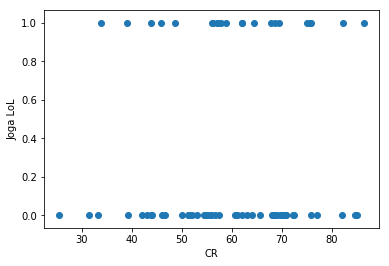

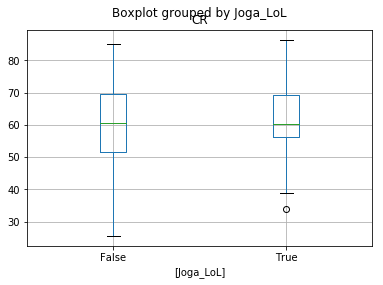

In [213]:
#Alunos que não jogam LoL x Alunos que jogam LoL
plt.scatter( tabela.CR, tabela.Joga_LoL)
plt.ylabel('Joga LoL')
plt.xlabel('CR')
plt.show()

categad = pd.DataFrame(tabela, columns=['CR', 'Joga_LoL'])
categad.boxplot(by='Joga_LoL')

(0.9792548418045044, 0.5344253778457642)
(0.9821277260780334, 0.9459398984909058)


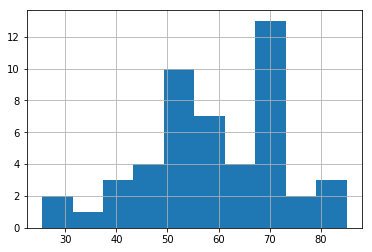

In [214]:
#teste das suposições

print(stats.shapiro(categad.CR.loc[categad.Joga_LoL == False]))
print(stats.shapiro(categad.CR.loc[categad.Joga_LoL == True]))

#a saída do teste é o valor W e o p-value
#considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados. 
categad.CR.loc[categad.Joga_LoL == False].hist()

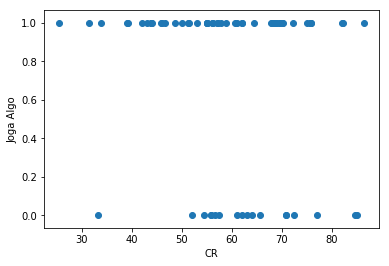

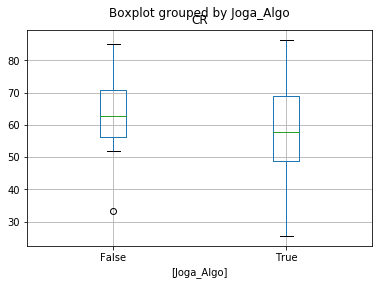

In [215]:
# Alunos que não jogam x Alunos que jogam algum tipo de jogo
plt.scatter( tabela.CR, tabela.Joga_Algo)
plt.ylabel('Joga Algo')
plt.xlabel('CR')
plt.show()

categad = pd.DataFrame(tabela, columns=['CR', 'Joga_Algo'])
categad.boxplot(by='Joga_Algo')

(0.9517319202423096, 0.45283013582229614)
(0.982120931148529, 0.6073822975158691)


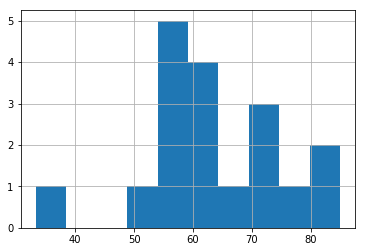

In [216]:
print(stats.shapiro(categad.CR.loc[categad.Joga_Algo == False]))
print(stats.shapiro(categad.CR.loc[categad.Joga_Algo == True]))

#a saída do teste é o valor W e o p-value
#considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados. 
categad.CR.loc[categad.Joga_Algo == False].hist()

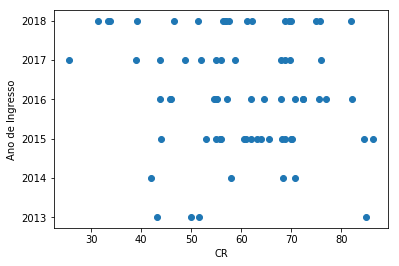

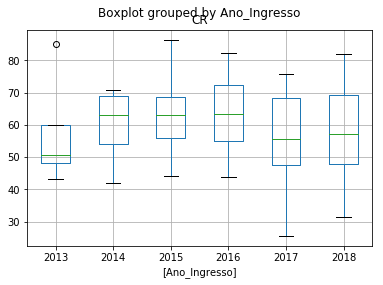

In [217]:
# Ano de Ingresso x CR
plt.scatter( tabela.CR, tabela.Ano_Ingresso)
plt.ylabel('Ano de Ingresso')
plt.xlabel('CR')
plt.show()

categad = pd.DataFrame(tabela, columns=['CR', 'Ano_Ingresso'])
categad.boxplot(by='Ano_Ingresso')

C:\Users\giova\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


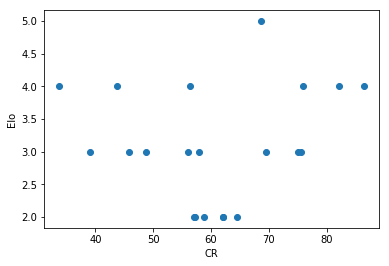

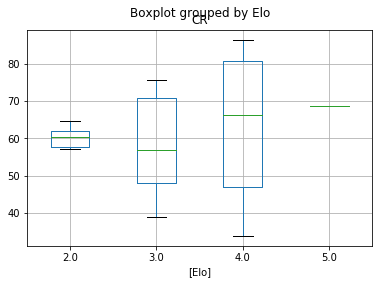

In [218]:
# É necessário mapear os Elos
jogaLol['Elo'] = jogaLol['Elo'].map({'BRONZE': 1, 'SILVER': 2, 'GOLD': 3, 'PLATINUM': 4,'DIAMOND': 5})

# Elo x CR
plt.scatter( jogaLol.CR, jogaLol.Elo)
plt.ylabel('Elo')
plt.xlabel('CR')
plt.show()

categad = pd.DataFrame(jogaLol, columns=['CR', 'Elo'])
categad.boxplot(by = 'Elo')

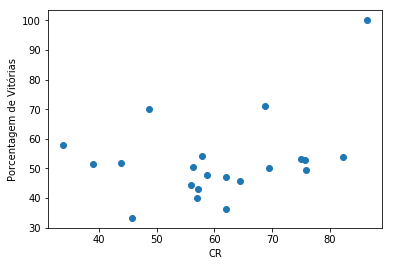

In [219]:
# Porcentagem de Vitorias x CR
plt.scatter( jogaLol.CR, jogaLol.Porcentagem_Vitorias)
plt.ylabel('Porcentagem de Vitórias')
plt.xlabel('CR')
plt.show()

#categad = pd.DataFrame(jogaLol, columns=['CR', 'Porcentagem_Vitorias'])
#categad.boxplot(by='Porcentagem_Vitorias') 

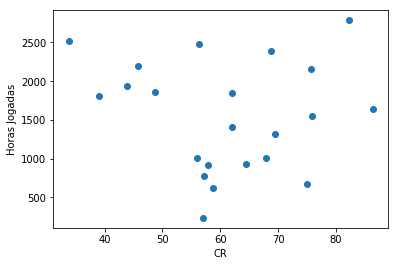

In [220]:
# Horas Jogadas x CR
plt.scatter( jogaLol.CR, jogaLol.Horas_Jogadas)
plt.ylabel('Horas Jogadas')
plt.xlabel('CR')
plt.show()

#categad = pd.DataFrame(jogaLol, columns=['CR', 'Horas_Jogadas'])
#categad.boxplot(by='Horas_Jogadas')

### Algumas análises aleatórias a partir daqui:

In [221]:
deveriaFormar = tabela[tabela['Ano_Ingresso']<=2015]
print("Média de quem já deveria estar formado: ", deveriaFormar['CR'].mean())

Média de quem já deveria estar formado:  62.27199999999999


Text(0.5,0,'Número Alunos')

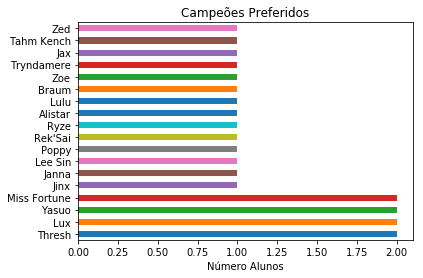

In [222]:
jogaLol.Campeao_Preferido.value_counts().plot(kind='barh')
plt.title('Campeões Preferidos')
plt.xlabel('Número Alunos')

Text(0,0.5,'Número Alunos')

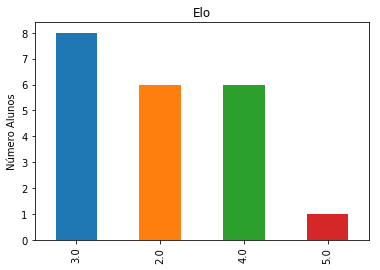

In [223]:
jogaLol.Elo.value_counts().plot(kind='bar')
plt.title('Elo')
plt.ylabel('Número Alunos')